# 13.Cluster the stations based on facilities. What type of stations exist? Are some stations ‘odd’ in the facilities they provide? What would you suggest to do with these? Is there a correlation between station type and number of daily trains?

In [ ]:
import src.data_processing.data as data
from mlxtend.frequent_patterns import apriori


Some odd stations for example supply wheelchairs but no disabled parkign spots or elevators

In [2]:
facilities = data.facilities
only_facilities= facilities[['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']]
only_facilities

ticket_vending_machine  luggage_lockers  free_parking  taxi  \
2                       1.0              0.0           1.0   1.0   
3                       0.0              0.0           1.0   0.0   
4                       1.0              0.0           1.0   0.0   
5                       1.0              0.0           1.0   0.0   
6                       1.0              0.0           0.0   0.0   
..                      ...              ...           ...   ...   
668                     1.0              0.0           1.0   0.0   
669                     1.0              0.0           1.0   0.0   
670                     1.0              0.0           1.0   0.0   
672                     1.0              0.0           1.0   0.0   
673                     1.0              0.0           1.0   0.0   

     bicycle_spots  blue-bike  bus  tram  metro  wheelchair_available  ramp  \
2              1.0        1.0  1.0   0.0    0.0                   1.0   1.0   
3              0.0        0.0  0.0   0.0    0.0                   0.0   0.0   
4              1.0        1.0  1.0   0.0    0.0                   0.0   0.0   
5              1.0        1.0  1.0   0.0    0.0                   1.0   1.0   
6              0.0        0.0  0.0   0.0    0.0                   0.0   0.0   
..             ...        ...  ...   ...    ...                   ...   ...   
668            0.0        0.0  0.0   0.0    0.0                   0.0   0.0   
669            0.0        0.0  0.0   0.0    0.0                   0.0   0.0   
670            1.0        0.0  1.0   0.0    0.0                   1.0   1.0   
672            1.0        0.0  0.0   0.0    0.0                   0.0   0.0   
673            1.0        0.0  1.0   0.0    0.0                   0.0   0.0   

     disabled_parking_spots  elevated_platform  escalator_up  escalator_down  \
2                         1                1.0           0.0             0.0   
3                         0                0.0           0.0             0.0   
4                         1                0.0           0.0             0.0   
5                         1                0.0           0.0             0.0   
6                         0                0.0           0.0             0.0   
..                      ...                ...           ...             ...   
668                       1                0.0           0.0             0.0   
669                       1                0.0           0.0             0.0   
670                       1                0.0           0.0             0.0   
672                       0                0.0           0.0             0.0   
673                       0                0.0           0.0             0.0   

     elevator_platform  audio_induction_loop  
2                  1.0                   1.0  
3                  0.0                   0.0  
4                  0.0                   1.0  
5                  0.0                   1.0  
6                  0.0                   0.0  
..                 ...                   ...  
668                0.0                   0.0  
669                0.0                   0.0  
670                0.0                   1.0  
672                0.0                   0.0  
673                0.0                   0.0  

[557 rows x 17 columns]

Impossible to do K-means clustering algorithms because of boolean values
Also tried Hamming distance, Jaccard similarity

We can check frequent dataset mining


In [3]:
frequent_facilities = apriori(only_facilities, min_support=0.0000001, use_colnames = True)
frequent_facilities

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0       0.868941                           (ticket_vending_machine)
1       0.032316                                  (luggage_lockers)
2       0.700180                                     (free_parking)
3       0.078995                                             (taxi)
4       0.346499                                    (bicycle_spots)
...          ...                                                ...
131066  0.001795  (metro, free_parking, ticket_vending_machine, ...
131067  0.001795  (metro, ticket_vending_machine, tram, elevated...
131068  0.001795  (metro, free_parking, ticket_vending_machine, ...
131069  0.001795  (metro, free_parking, tram, elevated_platform,...
131070  0.001795  (metro, free_parking, ticket_vending_machine, ...

[131071 rows x 2 columns]

In [4]:
# meaning of support
len(only_facilities[only_facilities["ticket_vending_machine"] == 1])/ only_facilities["ticket_vending_machine"].count()

0.8689407540394973

Prefer to cluster the stations based on logic

Stations with:
1. no facilities
2. bicycle facilities: bicycle spots, blue bike
3. transport facilities: bus, tram, metro,taxi, free_parking
4. facilities for people in wheelchair: wheelchair_available, ramp, disabled_parking_spots, elevated_platform, escalartor_up, escalator_down, elevator_platform

Some stations don't have any facilities

In [5]:
facilities["has_facilities"] = facilities[['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].apply(lambda x: 1 if x.sum() >=1 else 0, axis=1)
facilities

URI              name                    street   zip  \
2    008895000             aalst           Stationsplein 9  9300   
3    008895125  aalst-kerrebroek                  Ledebaan  9300   
4    008891140            aalter           Stationsplein 2  9880   
5    008833209          aarschot               Statieplein  3200   
6    008892288           aarsele       Hogenhovenstraat Zn  8700   
..         ...               ...                       ...   ...   
668  008832250            zolder        Stationsstraat Z/n  3550   
669  008832334          zonhoven            Engstegenseweg  3520   
670  008895208          zottegem          Stationsplein 12  9620   
672  008894821       zwijndrecht                Fortlaan 1  2070   
673  008883212       écaussinnes  Avenue De La Déportation  7190   

                 city  ticket_vending_machine  luggage_lockers  free_parking  \
2               Aalst                     1.0              0.0           1.0   
3               Aalst                     0.0              0.0           1.0   
4              Aalter                     1.0              0.0           1.0   
5            Aarschot                     1.0              0.0           1.0   
6             Aarsele                     1.0              0.0           0.0   
..                ...                     ...              ...           ...   
668  Heusden - Zolder                     1.0              0.0           1.0   
669          Zonhoven                     1.0              0.0           1.0   
670          Zottegem                     1.0              0.0           1.0   
672       Zwijndrecht                     1.0              0.0           1.0   
673       Ecaussinnes                     1.0              0.0           1.0   

     taxi  bicycle_spots  ...  sales_close_wednesday  sales_open_thursday  \
2     1.0            1.0  ...        0 days 20:00:00      0 days 05:45:00   
3     0.0            0.0  ...        0 days 00:00:00      0 days 00:00:00   
4     0.0            1.0  ...        0 days 14:15:00      0 days 07:00:00   
5     0.0            1.0  ...        0 days 20:00:00      0 days 05:45:00   
6     0.0            0.0  ...        0 days 00:00:00      0 days 00:00:00   
..    ...            ...  ...                    ...                  ...   
668   0.0            0.0  ...        0 days 00:00:00      0 days 00:00:00   
669   0.0            0.0  ...        0 days 00:00:00      0 days 00:00:00   
670   0.0            1.0  ...        0 days 20:00:00      0 days 05:45:00   
672   0.0            1.0  ...        0 days 00:00:00      0 days 00:00:00   
673   0.0            1.0  ...        0 days 00:00:00      0 days 00:00:00   

     sales_close_thursday  sales_open_friday  sales_close_friday  \
2         0 days 20:00:00    0 days 05:45:00     0 days 20:00:00   
3         0 days 00:00:00    0 days 00:00:00     0 days 00:00:00   
4         0 days 14:15:00    0 days 07:00:00     0 days 14:15:00   
5         0 days 20:00:00    0 days 05:45:00     0 days 20:00:00   
6         0 days 00:00:00    0 days 00:00:00     0 days 00:00:00   
..                    ...                ...                 ...   
668       0 days 00:00:00    0 days 00:00:00     0 days 00:00:00   
669       0 days 00:00:00    0 days 00:00:00     0 days 00:00:00   
670       0 days 20:00:00    0 days 05:45:00     0 days 20:00:00   
672       0 days 00:00:00    0 days 00:00:00     0 days 00:00:00   
673       0 days 00:00:00    0 days 00:00:00     0 days 00:00:00   

     sales_open_saturday  sales_close_saturday  sales_open_sunday  \
2        0 days 06:00:00       0 days 20:00:00    0 days 06:00:00   
3        0 days 00:00:00       0 days 00:00:00    0 days 00:00:00   
4        0 days 07:45:00       0 days 15:00:00    0 days 07:45:00   
5        0 days 06:00:00       0 days 20:00:00    0 days 07:00:00   
6        0 days 00:00:00       0 days 00:00:00    0 days 00:00:00   
..                   ...                   ...                ...   
668     

Bicycle facilities

In [6]:
facilities["has_bicycle_facilities"] = facilities[[ 'bicycle_spots', 'blue-bike']].apply(lambda x: 1 if x.sum() >=1 else 0, axis=1)
facilities

URI              name                    street   zip  \
2    008895000             aalst           Stationsplein 9  9300   
3    008895125  aalst-kerrebroek                  Ledebaan  9300   
4    008891140            aalter           Stationsplein 2  9880   
5    008833209          aarschot               Statieplein  3200   
6    008892288           aarsele       Hogenhovenstraat Zn  8700   
..         ...               ...                       ...   ...   
668  008832250            zolder        Stationsstraat Z/n  3550   
669  008832334          zonhoven            Engstegenseweg  3520   
670  008895208          zottegem          Stationsplein 12  9620   
672  008894821       zwijndrecht                Fortlaan 1  2070   
673  008883212       écaussinnes  Avenue De La Déportation  7190   

                 city  ticket_vending_machine  luggage_lockers  free_parking  \
2               Aalst                     1.0              0.0           1.0   
3               Aalst                     0.0              0.0           1.0   
4              Aalter                     1.0              0.0           1.0   
5            Aarschot                     1.0              0.0           1.0   
6             Aarsele                     1.0              0.0           0.0   
..                ...                     ...              ...           ...   
668  Heusden - Zolder                     1.0              0.0           1.0   
669          Zonhoven                     1.0              0.0           1.0   
670          Zottegem                     1.0              0.0           1.0   
672       Zwijndrecht                     1.0              0.0           1.0   
673       Ecaussinnes                     1.0              0.0           1.0   

     taxi  bicycle_spots  ...  sales_open_thursday  sales_close_thursday  \
2     1.0            1.0  ...      0 days 05:45:00       0 days 20:00:00   
3     0.0            0.0  ...      0 days 00:00:00       0 days 00:00:00   
4     0.0            1.0  ...      0 days 07:00:00       0 days 14:15:00   
5     0.0            1.0  ...      0 days 05:45:00       0 days 20:00:00   
6     0.0            0.0  ...      0 days 00:00:00       0 days 00:00:00   
..    ...            ...  ...                  ...                   ...   
668   0.0            0.0  ...      0 days 00:00:00       0 days 00:00:00   
669   0.0            0.0  ...      0 days 00:00:00       0 days 00:00:00   
670   0.0            1.0  ...      0 days 05:45:00       0 days 20:00:00   
672   0.0            1.0  ...      0 days 00:00:00       0 days 00:00:00   
673   0.0            1.0  ...      0 days 00:00:00       0 days 00:00:00   

     sales_open_friday  sales_close_friday  sales_open_saturday  \
2      0 days 05:45:00     0 days 20:00:00      0 days 06:00:00   
3      0 days 00:00:00     0 days 00:00:00      0 days 00:00:00   
4      0 days 07:00:00     0 days 14:15:00      0 days 07:45:00   
5      0 days 05:45:00     0 days 20:00:00      0 days 06:00:00   
6      0 days 00:00:00     0 days 00:00:00      0 days 00:00:00   
..                 ...                 ...                  ...   
668    0 days 00:00:00     0 days 00:00:00      0 days 00:00:00   
669    0 days 00:00:00     0 days 00:00:00      0 days 00:00:00   
670    0 days 05:45:00     0 days 20:00:00      0 days 07:15:00   
672    0 days 00:00:00     0 days 00:00:00      0 days 00:00:00   
673    0 days 00:00:00     0 days 00:00:00      0 days 00:00:00   

     sales_close_saturday  sales_open_sunday  sales_close_sunday  \
2         0 days 20:00:00    0 days 06:00:00     0 days 20:00:00   
3         0 days 00:00:00    0 days 00:00:00     0 days 00:00:00   
4         0 days 15:00:00    0 days 07:45:00     0 days 15:00:00   
5         0 days 20:00:00    0 days 07:00:00     0 days 14:15:00   
6         0 days 00:00:00    0 days 00:00:00     0 days 00:00:00   
..                    ...                ...                 ...   
668       0 days 00:00:00    0 days 00:

Transport facilities

In [27]:
facilities["has_transport_facilities"] = facilities[[ 'bus', 'tram', 'metro', "taxi", "free_parking", "luggage_lockers"]].apply(lambda x: 1 if x.sum() >=4 else 0, axis=1)
facilities

URI              name               street   zip              city  \
0    008895000             aalst      Stationsplein 9  9300             Aalst   
1    008895125  aalst-kerrebroek             Ledebaan  9300             Aalst   
2    008891140            aalter      Stationsplein 2  9880            Aalter   
3    008833209          aarschot          Statieplein  3200          Aarschot   
4    008892288           aarsele  Hogenhovenstraat Zn  8700           Aarsele   
..         ...               ...                  ...   ...               ...   
483  008892635            zingem     Stationsstraat 1  9750            Zingem   
484  008832250            zolder   Stationsstraat Z/n  3550  Heusden - Zolder   
485  008832334          zonhoven       Engstegenseweg  3520          Zonhoven   
486  008895208          zottegem     Stationsplein 12  9620          Zottegem   
487  008894821       zwijndrecht           Fortlaan 1  2070       Zwijndrecht   

     ticket_vending_machine  luggage_lockers  free_parking  taxi  \
0                       1.0              0.0           1.0   1.0   
1                       0.0              0.0           1.0   0.0   
2                       1.0              0.0           1.0   0.0   
3                       1.0              0.0           1.0   0.0   
4                       1.0              0.0           0.0   0.0   
..                      ...              ...           ...   ...   
483                     1.0              0.0           1.0   0.0   
484                     1.0              0.0           1.0   0.0   
485                     1.0              0.0           1.0   0.0   
486                     1.0              0.0           1.0   0.0   
487                     1.0              0.0           1.0   0.0   

     bicycle_spots  ...  sales_close_saturday  sales_open_sunday  \
0              1.0  ...       0 days 20:00:00    0 days 06:00:00   
1              0.0  ...       0 days 00:00:00    0 days 00:00:00   
2              1.0  ...       0 days 15:00:00    0 days 07:45:00   
3              1.0  ...       0 days 20:00:00    0 days 07:00:00   
4              0.0  ...       0 days 00:00:00    0 days 00:00:00   
..             ...  ...                   ...                ...   
483            0.0  ...       0 days 00:00:00    0 days 00:00:00   
484            0.0  ...       0 days 00:00:00    0 days 00:00:00   
485            0.0  ...       0 days 00:00:00    0 days 00:00:00   
486            1.0  ...       0 days 14:30:00    0 days 07:15:00   
487            1.0  ...       0 days 00:00:00    0 days 00:00:00   

     sales_close_sunday  has_facilities  has_bicycle_facilities  \
0       0 days 20:00:00               1                       1   
1       0 days 00:00:00               1                       0   
2       0 days 15:00:00               1                       1   
3       0 days 14:15:00               1                       1   
4       0 days 00:00:00               1                       0   
..                  ...             ...                     ...   
483     0 days 00:00:00               1                       0   
484     0 days 00:00:00               1                       0   
485     0 days 00:00:00               1                       0   
486     0 days 14:30:00               1                       1   
487     0 days 00:00:00               1                       1   

     has_transport_facilities  has_disabeld_persons_facilities  \
0                           0                                1   
1                           0                                0   
2                           0                                1   
3                           0                                1   
4                           0                                0   
..                        ...                              ...   
483                         0                                0   
484                         0                                1   
485  

Disabled persons facilities

In [8]:
facilities.columns

Index(['URI', 'name', 'street', 'zip', 'city', 'ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop',
       'sales_open_monday', 'sales_close_monday', 'sales_open_tuesday',
       'sales_close_tuesday', 'sales_open_wednesday', 'sales_close_wednesday',
       'sales_open_thursday', 'sales_close_thursday', 'sales_open_friday',
       'sales_close_friday', 'sales_open_saturday', 'sales_close_saturday',
       'sales_open_sunday', 'sales_close_sunday', 'has_facilities',
       'has_bicycle_facilities', 'has_transport_facilities'],
      dtype='object')

In [28]:
facilities["has_disabeld_persons_facilities"] = facilities[[ 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].apply(lambda x: 1 if x.sum() >=5 else 0, axis=1)
facilities

URI              name               street   zip              city  \
0    008895000             aalst      Stationsplein 9  9300             Aalst   
1    008895125  aalst-kerrebroek             Ledebaan  9300             Aalst   
2    008891140            aalter      Stationsplein 2  9880            Aalter   
3    008833209          aarschot          Statieplein  3200          Aarschot   
4    008892288           aarsele  Hogenhovenstraat Zn  8700           Aarsele   
..         ...               ...                  ...   ...               ...   
483  008892635            zingem     Stationsstraat 1  9750            Zingem   
484  008832250            zolder   Stationsstraat Z/n  3550  Heusden - Zolder   
485  008832334          zonhoven       Engstegenseweg  3520          Zonhoven   
486  008895208          zottegem     Stationsplein 12  9620          Zottegem   
487  008894821       zwijndrecht           Fortlaan 1  2070       Zwijndrecht   

     ticket_vending_machine  luggage_lockers  free_parking  taxi  \
0                       1.0              0.0           1.0   1.0   
1                       0.0              0.0           1.0   0.0   
2                       1.0              0.0           1.0   0.0   
3                       1.0              0.0           1.0   0.0   
4                       1.0              0.0           0.0   0.0   
..                      ...              ...           ...   ...   
483                     1.0              0.0           1.0   0.0   
484                     1.0              0.0           1.0   0.0   
485                     1.0              0.0           1.0   0.0   
486                     1.0              0.0           1.0   0.0   
487                     1.0              0.0           1.0   0.0   

     bicycle_spots  ...  sales_close_saturday  sales_open_sunday  \
0              1.0  ...       0 days 20:00:00    0 days 06:00:00   
1              0.0  ...       0 days 00:00:00    0 days 00:00:00   
2              1.0  ...       0 days 15:00:00    0 days 07:45:00   
3              1.0  ...       0 days 20:00:00    0 days 07:00:00   
4              0.0  ...       0 days 00:00:00    0 days 00:00:00   
..             ...  ...                   ...                ...   
483            0.0  ...       0 days 00:00:00    0 days 00:00:00   
484            0.0  ...       0 days 00:00:00    0 days 00:00:00   
485            0.0  ...       0 days 00:00:00    0 days 00:00:00   
486            1.0  ...       0 days 14:30:00    0 days 07:15:00   
487            1.0  ...       0 days 00:00:00    0 days 00:00:00   

     sales_close_sunday  has_facilities  has_bicycle_facilities  \
0       0 days 20:00:00               1                       1   
1       0 days 00:00:00               1                       0   
2       0 days 15:00:00               1                       1   
3       0 days 14:15:00               1                       1   
4       0 days 00:00:00               1                       0   
..                  ...             ...                     ...   
483     0 days 00:00:00               1                       0   
484     0 days 00:00:00               1                       0   
485     0 days 00:00:00               1                       0   
486     0 days 14:30:00               1                       1   
487     0 days 00:00:00               1                       1   

     has_transport_facilities  has_disabeld_persons_facilities  \
0                           0                                1   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   
..                        ...                              ...   
483                         0                                0   
484                         0                                0   
485  

Create a code for the total kinds of facilities each station has

In [10]:
# facilities["Total facilities"] = facilities[['has_facilities', 'has_wheelchair_facilities','has_bicycle_facilities','has_transport_facilities']]\
#     .apply(lambda x: "Z" if x[0] == 0 else "".join([chr(65+i) for i in range(0,3) if x[i]]), axis=1)
# facilities



In [29]:
def get_facilities(x):
    if x[0] == 0:
        return "Z"
    # if all facilities are 0, then return A
    elif x[0] == 1 and x[1] == 0 and x[2] == 0 and x[3] == 0:
        return "A"
    # else, return the facilities that are available
    else:
        return "".join([chr(65+i) for i in range(1,4) if x[i]])

# apply the function to the facilities dataframe
facilities["Total facilities"] = facilities[['has_facilities', 'has_bicycle_facilities','has_transport_facilities', 'has_disabeld_persons_facilities' ]].apply(get_facilities, axis=1)
facilities


URI              name               street   zip              city  \
0    008895000             aalst      Stationsplein 9  9300             Aalst   
1    008895125  aalst-kerrebroek             Ledebaan  9300             Aalst   
2    008891140            aalter      Stationsplein 2  9880            Aalter   
3    008833209          aarschot          Statieplein  3200          Aarschot   
4    008892288           aarsele  Hogenhovenstraat Zn  8700           Aarsele   
..         ...               ...                  ...   ...               ...   
483  008892635            zingem     Stationsstraat 1  9750            Zingem   
484  008832250            zolder   Stationsstraat Z/n  3550  Heusden - Zolder   
485  008832334          zonhoven       Engstegenseweg  3520          Zonhoven   
486  008895208          zottegem     Stationsplein 12  9620          Zottegem   
487  008894821       zwijndrecht           Fortlaan 1  2070       Zwijndrecht   

     ticket_vending_machine  luggage_lockers  free_parking  taxi  \
0                       1.0              0.0           1.0   1.0   
1                       0.0              0.0           1.0   0.0   
2                       1.0              0.0           1.0   0.0   
3                       1.0              0.0           1.0   0.0   
4                       1.0              0.0           0.0   0.0   
..                      ...              ...           ...   ...   
483                     1.0              0.0           1.0   0.0   
484                     1.0              0.0           1.0   0.0   
485                     1.0              0.0           1.0   0.0   
486                     1.0              0.0           1.0   0.0   
487                     1.0              0.0           1.0   0.0   

     bicycle_spots  ...  sales_close_saturday  sales_open_sunday  \
0              1.0  ...       0 days 20:00:00    0 days 06:00:00   
1              0.0  ...       0 days 00:00:00    0 days 00:00:00   
2              1.0  ...       0 days 15:00:00    0 days 07:45:00   
3              1.0  ...       0 days 20:00:00    0 days 07:00:00   
4              0.0  ...       0 days 00:00:00    0 days 00:00:00   
..             ...  ...                   ...                ...   
483            0.0  ...       0 days 00:00:00    0 days 00:00:00   
484            0.0  ...       0 days 00:00:00    0 days 00:00:00   
485            0.0  ...       0 days 00:00:00    0 days 00:00:00   
486            1.0  ...       0 days 14:30:00    0 days 07:15:00   
487            1.0  ...       0 days 00:00:00    0 days 00:00:00   

     sales_close_sunday  has_facilities  has_bicycle_facilities  \
0       0 days 20:00:00               1                       1   
1       0 days 00:00:00               1                       0   
2       0 days 15:00:00               1                       1   
3       0 days 14:15:00               1                       1   
4       0 days 00:00:00               1                       0   
..                  ...             ...                     ...   
483     0 days 00:00:00               1                       0   
484     0 days 00:00:00               1                       0   
485     0 days 00:00:00               1                       0   
486     0 days 14:30:00               1                       1   
487     0 days 00:00:00               1                       1   

     has_transport_facilities  has_disabeld_persons_facilities  \
0                           0                                1   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   
..                        ...                              ...   
483                         0                                0   
484                         0                                0   
485  

Create the different clusters

In [31]:
facilities["Total facilities"].unique()

array(['BD', 'A', 'B', 'BC', 'BCD', 'Z', 'D'], dtype=object)

# Number of daily trains

In [32]:
trips = data.full_trips

In [33]:
daily_trains = trips["Name of the stop"].value_counts().reset_index().rename(columns={"index": "Name of the stop", "Name of the stop": "count"}).astype({"count": int})
# daily_trains["count"] = daily_trains["count"]/7
daily_trains["Name of the stop"]=daily_trains["Name of the stop"].str.lower()
daily_trains

Name of the stop  count
0                 brussel-zuid   7421
1                brussel-noord   6899
2             brussel-centraal   6892
3          brussel-kapellekerk   6892
4              brussel-congres   6892
..                         ...    ...
622          oostende-zeehaven      3
623            leuven-bundel m      2
624       hasselt-aflos l.35/1      1
625              gent-zeehaven      1
626  gent-sint-pieters-bundels      1

[627 rows x 2 columns]

In [34]:
facilities = facilities.merge(daily_trains, left_on = "name", right_on="Name of the stop")
facilities

URI              name               street   zip              city  \
0    008895000             aalst      Stationsplein 9  9300             Aalst   
1    008895125  aalst-kerrebroek             Ledebaan  9300             Aalst   
2    008891140            aalter      Stationsplein 2  9880            Aalter   
3    008833209          aarschot          Statieplein  3200          Aarschot   
4    008892288           aarsele  Hogenhovenstraat Zn  8700           Aarsele   
..         ...               ...                  ...   ...               ...   
483  008892635            zingem     Stationsstraat 1  9750            Zingem   
484  008832250            zolder   Stationsstraat Z/n  3550  Heusden - Zolder   
485  008832334          zonhoven       Engstegenseweg  3520          Zonhoven   
486  008895208          zottegem     Stationsplein 12  9620          Zottegem   
487  008894821       zwijndrecht           Fortlaan 1  2070       Zwijndrecht   

     ticket_vending_machine  luggage_lockers  free_parking  taxi  \
0                       1.0              0.0           1.0   1.0   
1                       0.0              0.0           1.0   0.0   
2                       1.0              0.0           1.0   0.0   
3                       1.0              0.0           1.0   0.0   
4                       1.0              0.0           0.0   0.0   
..                      ...              ...           ...   ...   
483                     1.0              0.0           1.0   0.0   
484                     1.0              0.0           1.0   0.0   
485                     1.0              0.0           1.0   0.0   
486                     1.0              0.0           1.0   0.0   
487                     1.0              0.0           1.0   0.0   

     bicycle_spots  ...  sales_close_sunday  has_facilities  \
0              1.0  ...     0 days 20:00:00               1   
1              0.0  ...     0 days 00:00:00               1   
2              1.0  ...     0 days 15:00:00               1   
3              1.0  ...     0 days 14:15:00               1   
4              0.0  ...     0 days 00:00:00               1   
..             ...  ...                 ...             ...   
483            0.0  ...     0 days 00:00:00               1   
484            0.0  ...     0 days 00:00:00               1   
485            0.0  ...     0 days 00:00:00               1   
486            1.0  ...     0 days 14:30:00               1   
487            1.0  ...     0 days 00:00:00               1   

     has_bicycle_facilities  has_transport_facilities  \
0                         1                         0   
1                         0                         0   
2                         1                         0   
3                         1                         0   
4                         0                         0   
..                      ...                       ...   
483                       0                         0   
484                       0                         0   
485                       0                         0   
486                       1                         0   
487                       1                         0   

     has_disabeld_persons_facilities  Total facilities  Name of the stop_x  \
0                                  1                BD               aalst   
1                                  0                 A    aalst-kerrebroek   
2                                  0                 B              aalter   
3                                  0                 B            aarschot   
4                                  0                 A             aarsele   
..                               ...               ...                 ...   
483                                0                 A              zingem   
484                                0                 A              zolder   
485                                0                 A            zonhoven   

<AxesSubplot: xlabel='Total facilities'>

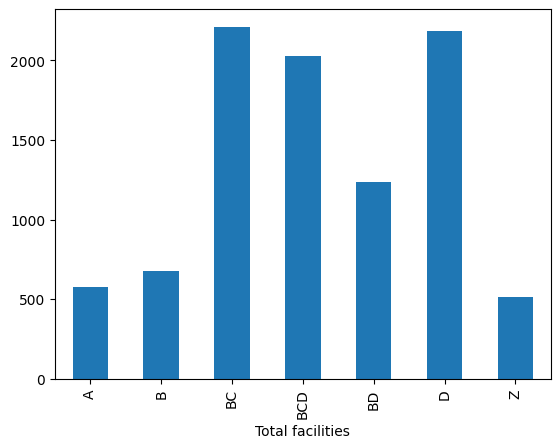

In [36]:
facilities.groupby("Total facilities")["count"].mean().plot.bar()